In [1]:
from datetime import date
import pandas as pd
import os
import glob
import pycytominer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2 

In [2]:
# load custom collection of functions
import sys
sys.path.append('/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/')
import utility_functions as UTIL

In [3]:
parent_directory = "/home/schmiedc/FMP_Docs/Projects/Bioactives_data/"

input_path = parent_directory + "results/"
output_path = input_path

figure_path = parent_directory + "figures/"

In [4]:
# data_HepG2_Norm = pd.read_csv(input_path + "2023-04-11_Bioactives_HepG2_norm.csv")
file_HepG2_type = '/*[0-9]_' + 'MEDINA_HepG2_norm.csv'
files_HepG2 = glob.glob(input_path + file_HepG2_type)

### gets latest file
max_file_HepG2 = max(files_HepG2, key=os.path.getctime)

### load file
data_HepG2_Norm = pd.read_csv(max_file_HepG2)
data_HepG2_Norm.shape

(10735, 2984)

# Feature Selection

Modified from Carsten Beese

Variance frequency cut off 0.1

Variance unique cut off 0.1

Outlier cut off 100


Modified:
Corr Treshold 0.9

In [5]:
# HepG2 feature reduction
print("Feature reduction with correlation threshold 0.9 and Outlier threshold 100")
HepG2_Reduced_Carsten_100_Mod = UTIL.feature_reduction(data_HepG2_Norm, 
                                         variance_freq_cut=0.1, 
                                         variance_unique_cut=0.1, 
                                         outlier_cutoff=100, 
                                         corr_threshold = 0.9, 
                                         print_stats = True)

Feature reduction with correlation threshold 0.9 and Outlier threshold 100
| Category           |   Original Features |   Variance Threshold |   % Variance |   Outlier Threshold |   % Outlier |   Correlation Threshold |   % Correlation |
|:-------------------|--------------------:|---------------------:|-------------:|--------------------:|------------:|------------------------:|----------------:|
| Total Features     |                2977 |                 2807 |         94.3 |                2309 |        77.6 |                     575 |            19.3 |
| Intensity          |                 180 |                  180 |        100   |                 167 |        92.8 |                      40 |            22.2 |
| Correlation        |                 180 |                  120 |         66.7 |                 103 |        57.2 |                      78 |            43.3 |
| AreaShape          |                 162 |                  153 |         94.4 |                 128 |      

# Consensus Feature reduction

In [6]:
## gets feature vector
Features_HepG2_Reduced_Carsten_100_Mod = UTIL.get_feature_vector(HepG2_Reduced_Carsten_100_Mod)
Features_HepG2_Reduced_Carsten_100_Mod.append("Metadata_Object_Count") 


HepG2_Norm_Reduced_Median = pycytominer.consensus(
        profiles = HepG2_Reduced_Carsten_100_Mod, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Reduced_Carsten_100_Mod, # (str, list) – The features to collapse, defaults to “infer”
)

In [7]:
# Moves position of Metadata_Object_Count column
HepG2_column_to_move = HepG2_Norm_Reduced_Median.pop("Metadata_Object_Count")
HepG2_Norm_Reduced_Median.insert(4, "Metadata_Object_Count", HepG2_column_to_move)
HepG2_Norm_Reduced_Median.head()

,Metadata_EOS,Metadata_Plate,Metadata_Concentration,Metadata_Partner,Metadata_Object_Count,Nuc_AreaShape_Compactness,Nuc_AreaShape_Eccentricity,Nuc_AreaShape_FormFactor,Nuc_AreaShape_MaxFeretDiameter,Nuc_AreaShape_Orientation,...,Cyto_Texture_InfoMeas2_Mito_3_02_256,Cyto_Texture_InverseDifferenceMoment_AGP_10_01_256,Cyto_Texture_InverseDifferenceMoment_DNA_5_03_256,Cyto_Texture_InverseDifferenceMoment_ER_10_00_256,Cyto_Texture_InverseDifferenceMoment_ER_10_01_256,Cyto_Texture_InverseDifferenceMoment_ER_10_02_256,Cyto_Texture_InverseDifferenceMoment_ER_10_03_256,Cyto_Texture_SumAverage_DNA_3_01_256,Cyto_Texture_SumAverage_ER_3_03_256,Cyto_Texture_SumEntropy_ER_3_00_256
0,DMSO,B1001,0,Bioactives,1743.5,0.000000e+00,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,1.700029e-15,0.000000e+00,-1.299308e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,DMSO,B1002,0,Bioactives,1694.0,-6.789745e-15,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-2.550044e-15,3.800129e-15,0.000000e+00,1.049941e-15,1.750336e-15,0.0
2,DMSO,B1003,0,Bioactives,1470.5,1.284996e-14,0.0,0.0,0.0,0.0,...,-5.950102e-15,-1.550030e-15,0.0,-1.850083e-15,-2.350550e-15,-1.798908e-15,-2.602085e-15,0.000000e+00,0.000000e+00,0.0
3,DMSO,B1004,0,Bioactives,1974.5,0.000000e+00,0.0,0.0,0.0,0.0,...,-6.799682e-15,0.000000e+00,0.0,-1.950697e-15,9.497611e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
4,DMSO,B1005,0,Bioactives,1970.0,-1.005099e-14,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2.150190e-15,-1.549975e-15,-2.900024e-15,0.000000e+00,-1.849974e-15,0.0


In [8]:
# filename_HepG2_Norm_Reduced_Median = output_path + str(date.today()) + "_Bioactives_HepG2_norm_reduced_Median_Cell-Number.csv"
# HepG2_Norm_Reduced_Median.to_csv(filename_HepG2_Norm_Reduced_Median, index = False)

# Create Feature annotation for Profile Viz

In [9]:
HepG2_Norm_Reduced_Median_copy = HepG2_Norm_Reduced_Median.copy()
HepG2_Norm_Reduced_Median_copy.columns = HepG2_Norm_Reduced_Median_copy.columns.str.split('_', expand=True, n=2)
HepG2_Norm_Reduced_Median_copy.head()

Metadata                                                    Nuc  \
       EOS  Plate Concentration     Partner  Object     AreaShape   
       NaN    NaN           NaN         NaN   Count   Compactness   
0     DMSO  B1001             0  Bioactives  1743.5  0.000000e+00   
1     DMSO  B1002             0  Bioactives  1694.0 -6.789745e-15   
2     DMSO  B1003             0  Bioactives  1470.5  1.284996e-14   
3     DMSO  B1004             0  Bioactives  1974.5  0.000000e+00   
4     DMSO  B1005             0  Bioactives  1970.0 -1.005099e-14   

                                                        ...  \
                                                        ...   
  Eccentricity FormFactor MaxFeretDiameter Orientation  ...   
0          0.0        0.0              0.0         0.0  ...   
1          0.0        0.0              0.0         0.0  ...   
2          0.0        0.0              0.0         0.0  ...   
3          0.0        0.0              0.0         0.0  ...   
4          0.0        0.0              0.0         0.0  ...   

                     Cyto                                        \
                  Texture                                         
  InfoMeas2_Mito_3_02_256 InverseDifferenceMoment_AGP_10_01_256   
0            0.000000e+00                          0.000000e+00   
1            0.000000e+00                          0.000000e+00   
2           -5.950102e-15                         -1.550030e-15   
3           -6.799682e-15                          0.000000e+00   
4            0.000000e+00                          0.000000e+00   

                                                                             \
                                                                              
  InverseDifferenceMoment_DNA_5_03_256 InverseDifferenceMoment_ER_10_00_256   
0                                  0.0                         1.700029e-15   
1                                  0.0                         0.000000e+00   
2                                  0.0                        -1.850083e-15   
3                                  0.0                        -1.950697e-15   
4                                  0.0                         0.000000e+00   

                                                                             \
                                                                              
  InverseDifferenceMoment_ER_10_01_256 InverseDifferenceMoment_ER_10_02_256   
0                         0.000000e+00                        -1.299308e-15   
1                        -2.550044e-15                         3.800129e-15   
2                        -2.350550e-15                        -1.798908e-15   
3                         9.497611e-16                         0.000000e+00   
4                         2.150190e-15                        -1.549975e-15   

                                                                \
                                                                 
  InverseDifferenceMoment_ER_10_03_256 SumAverage_DNA_3_01_256   
0                         0.000000e+00            0.000000e+00   
1                         0.000000e+00            1.049941e-15   
2                        -2.602085e-15            0.000000e+00   
3                         0.000000e+00            0.000000e+00   
4                        -2.900024e-15            0.000000e+00   

                                                 
                                                 
  SumAverage_ER_3_03_256 SumEntropy_ER_3_00_256  
0           0.000000e+00                    0.0  
1           1.750336e-15                    0.0  
2           0.000000e+00                    0.0  
3           0.000000e+00                    0.0  
4          -1.849974e-15                    0.0  

[5 rows x 580 columns]

In [10]:
filename_HepG2_Norm_Reduced_Median_ProfileViz = output_path + "ProfileViz/" +  str(date.today()) + "_MEDINA_HepG2_norm_reduced_Median_ProfileViz.csv"
HepG2_Norm_Reduced_Median_copy.to_csv(filename_HepG2_Norm_Reduced_Median_ProfileViz, index = False)

# Remove toxic compounds

Toxic conditions removed with threshold 698.86
Old shape (10735, 582)
New shape (10429, 582)


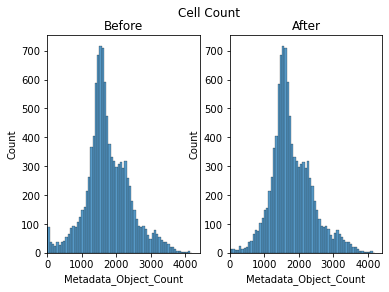

In [11]:
HepG2_Reduced_Tox, HepG2_Reduced_Tox_Cond = UTIL.remove_tox(
    HepG2_Reduced_Carsten_100_Mod, 
    key_col = ["Metadata_EOS", "Metadata_Plate"], 
    SD_Threshold = 2.5,  
    plot_distribution = True)

In [12]:
len(HepG2_Reduced_Tox["Metadata_EOS"].unique())

2387

# Raw % replication

In [13]:
HepG2_replicating, HepG2_corr_replicating_df = UTIL.remove_non_reproducible(
    HepG2_Reduced_Tox, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  61.8 |
Nonreplicating conditions removed with threshold 0.4
Old shape (10429, 582)
New shape (6784, 582)


/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/utility_functions.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


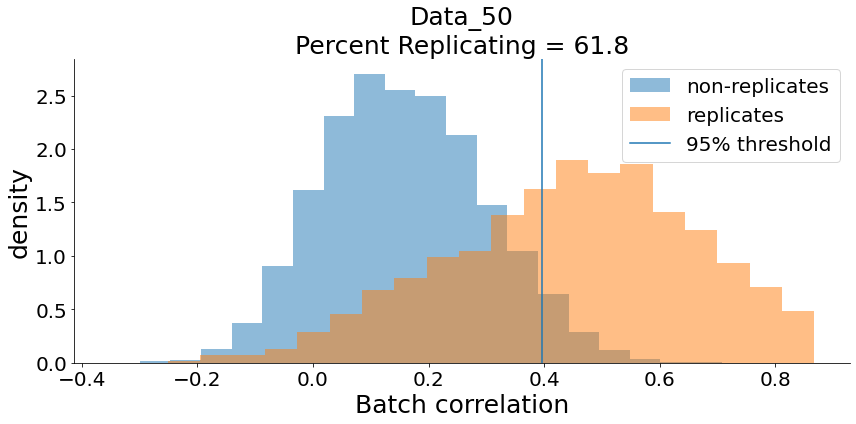

In [14]:
n_experiments = len(HepG2_corr_replicating_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(HepG2_corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(HepG2_corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(HepG2_corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{HepG2_corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {HepG2_corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

plt.savefig(figure_path + str(date.today()) + "_MEDINA_HepG2_Percent_Replicating.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)

# Compute Median for Induction

Tox filtered

Remove only toxic compounds

Non Replicating compounds are not removed


In [15]:
## gets feature vector
Features_HepG2_Norm_Reduced = UTIL.get_feature_vector(HepG2_Reduced_Tox)

HepG2_Norm_Reduced_Median = pycytominer.consensus(
        profiles = HepG2_Reduced_Tox, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate","Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Norm_Reduced, # (str, list) – The features to collapse, defaults to “infer”
)

In [16]:
len(HepG2_Norm_Reduced_Median["Metadata_EOS"].unique())

2387

# Remove compounds with low acitivity

In [17]:
key_col = ["Metadata_EOS", "Metadata_Plate", "Metadata_Partner"]

HepG2_active, HepG2_low_active = UTIL.remove_low_active(HepG2_Norm_Reduced_Median, 
                                                   key_col,
                                                   3.0, 
                                                   5.0)

print("HepG2 active:", len(HepG2_active["Metadata_EOS"].unique()))
print("HepG2 low-active:", len(HepG2_low_active["Metadata_EOS"].unique()))

HepG2 active: 845
HepG2 low-active: 1542


In [18]:
HepG2_low_active_EOS = pd.DataFrame(HepG2_low_active["Metadata_EOS"].unique(), columns = ["Metadata_EOS"])

filename_HepG2_low_active = output_path +  str(date.today()) + "_MEDINA_HepG2_low-active.csv"
HepG2_low_active_EOS.to_csv(filename_HepG2_low_active, index = False)

## Filter non active compounds from non consensus dataframe

In [19]:
HepG2_Reduced_Tox_active = HepG2_Reduced_Tox[
    (HepG2_Reduced_Tox['Metadata_EOS'].isin(HepG2_active['Metadata_EOS']))]

# % Replicating after Induction filter

In [20]:
HepG2_active_replicating, HepG2_active_corr_replicating_df = UTIL.remove_non_reproducible(
    HepG2_Reduced_Tox_active, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  87.7 |
Nonreplicating conditions removed with threshold 0.46
Old shape (3481, 582)
New shape (3068, 582)


/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/utility_functions.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


In [21]:
filename_HepG2_Norm_Reduced_Filtered = output_path + str(date.today()) + "_MEDINA_HepG2_norm_reduced_filtered.csv"
HepG2_active_replicating.to_csv(filename_HepG2_Norm_Reduced_Filtered, index = False)

In [22]:
# save non replicating compounds
HepG2_non_replicating = HepG2_Reduced_Tox_active[
    (~HepG2_Reduced_Tox_active['Metadata_EOS'].isin(HepG2_active_replicating['Metadata_EOS']))]

HepG2_non_replicating_EOS = pd.DataFrame(HepG2_non_replicating["Metadata_EOS"].unique(), columns = ["Metadata_EOS"])

filename_HepG2_non_replicating = output_path +  str(date.today()) + "_MEDINA_HepG2_non-replicating.csv"
HepG2_non_replicating_EOS.to_csv(filename_HepG2_non_replicating, index = False)

In [23]:
len(HepG2_non_replicating['Metadata_EOS'].unique())

104

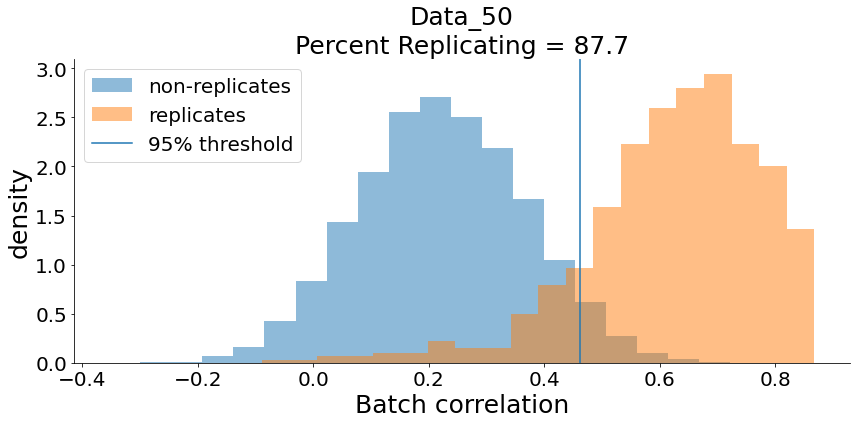

In [24]:
# plot % replicating
corr_replicating_df = HepG2_active_corr_replicating_df

n_experiments = len(corr_replicating_df)


plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

plt.savefig(figure_path + str(date.today()) + "_MEDINA_HepG2_Percent_Replicating_Induction_Filter.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)# 

# Consensus Tox, Induction, Replication Filter

In [25]:
## gets feature vector
Features_HepG2_Norm_Reduced_Filtered = UTIL.get_feature_vector(HepG2_active_replicating)

HepG2_Norm_Reduced_Filtered_Median = pycytominer.consensus(
        profiles = HepG2_active_replicating, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Norm_Reduced, # (str, list) – The features to collapse, defaults to “infer”
)

In [26]:
len(HepG2_Norm_Reduced_Filtered_Median["Metadata_EOS"].unique())

741

In [27]:
filename_HepG2_Norm_Reduced_Filtered_Median = output_path + str(date.today()) + "_MEDINA_HepG2_norm_reduced_filtered_median.csv"
HepG2_Norm_Reduced_Filtered_Median.to_csv(filename_HepG2_Norm_Reduced_Filtered_Median, index = False)

# Get non-active compounds

In [28]:
HepG2_non_replicating_merge = pd.merge(HepG2_active,
                                HepG2_Norm_Reduced_Filtered_Median,
                                on = ["Metadata_EOS"],
                                how = "outer",
                                indicator = True)

HepG2_non_replicating = HepG2_non_replicating_merge[
    HepG2_non_replicating_merge["_merge"] == 'left_only'].dropna(axis='columns')

In [29]:
HepG2_non_replicating_merge['_merge'].value_counts()

both          1131
left_only      104
right_only       0
Name: _merge, dtype: int64